# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
!pip install tensorflow
!pip install h5py
import h5py
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import layers and optimizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, LeakyReLU, MaxPooling2D

# Keras Sequential Model
from tensorflow.keras.models import Sequential


**Check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.19.0


## **Load the dataset**

- Split the data into the train and the test dataset.

In [ ]:
# Open the HDF5 file in read mode ('r')
with h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/SVHN_single_grey1.h5', 'r') as f:
    # List all datasets in the file
    print("Datasets in the file:")
    for dataset_name in f.keys():
        print(dataset_name)

h5 = h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/SVHN_single_grey1.h5', 'r')

x_train = h5['X_train'][:]
x_test = h5['X_test'][:]
y_train = h5['y_train'][:]
y_test = h5['y_test'][:]

Datasets in the file:
X_test
X_train
X_val
y_test
y_train
y_val


Check the number of images in the training and the testing dataset.

In [ ]:
len(x_train), len(x_test)

(42000, 18000)

In [ ]:
x_train.shape, x_test.shape

((42000, 32, 32), (18000, 32, 32))

**Observation:**

Data looks like it will be adequate for use in ANN and CNN modeling.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

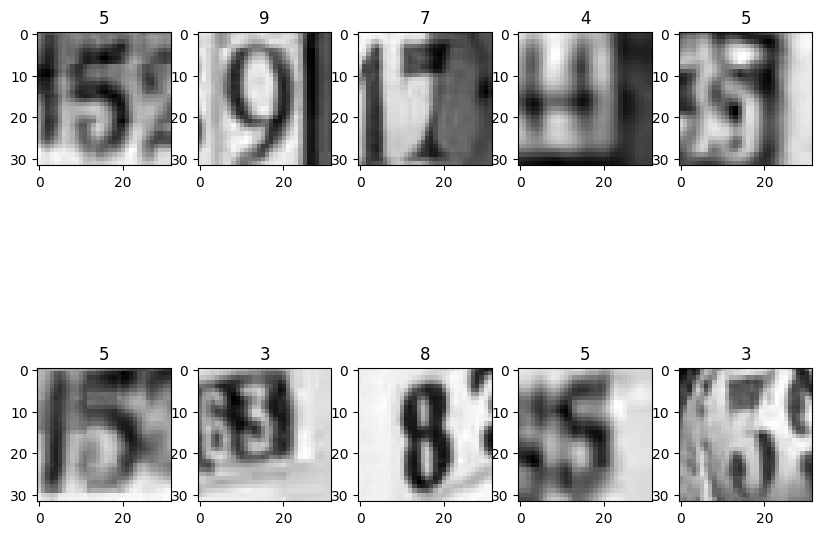

In [ ]:
num_classes=10
categories=np.unique(y_train)
rows = 2
cols = 5
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(x_train[random_index, :], cmap=plt.get_cmap('gray'))
        ax.set_title(categories[y_train[random_index]])
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# PRINT THE SHAPE
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

### **Normalize the train and the test data**

In [ ]:
#NORMALIZE THE TRAIN AND TEST DATASET
x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype('float32')/255.0

### **Print the new shapes of Training and Test data**

In [ ]:
#PRINT NEW SHAPES
x_train_norm[0], x_test_norm[0]

(array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
         0.16860352],
        [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
         0.33056822],
        [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
         0.45263842],
        ...,
        [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
         0.10219726],
        [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
         0.11790627],
        [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
         0.20799099]], dtype=float32),
 array([[0.15905097, 0.18349686, 0.19206432, ..., 0.43966785, 0.44309962,
         0.43986115],
        [0.15465844, 0.17369059, 0.18500705, ..., 0.43534195, 0.43508825,
         0.4311247 ],
        [0.1507796 , 0.1711349 , 0.19101882, ..., 0.4309494 , 0.43114275,
         0.42786196],
        ...,
        [0.13720353, 0.13910078, 0.15555921, ..., 0.42827842, 0.4310094 ,
         0.44209644

### **One-hot encode output**

In [ ]:
#ONE HOT ENCODE
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:**

The preprocessing hasn't revealed any issues with the data.


## **Model Building**
## Fix the seed for random number generators

In [ ]:
import random
np.random.seed(11)
random.seed(11)
tf.random.set_seed(11)

### **Model Architecture**
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
ANN_model = Sequential()
ANN_model.add(Flatten(input_shape=(32, 32)))
ANN_model.add(Dense(64, input_shape=(1024,), activation='relu'))
ANN_model.add(Dense(32, activation='relu'))
ANN_model.add(Dense(10, activation='softmax'))


In [ ]:
optimizer = Adam(learning_rate=0.001)
ANN_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
nn_model_1 = ANN_model
print(nn_model_1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history_1 = ANN_model.fit(x_train_norm, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1057 - loss: 2.3202 - val_accuracy: 0.1637 - val_loss: 2.2764
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1626 - loss: 2.2343 - val_accuracy: 0.2387 - val_loss: 2.0834
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2573 - loss: 2.0431 - val_accuracy: 0.3264 - val_loss: 1.9077
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3571 - loss: 1.8326 - val_accuracy: 0.3937 - val_loss: 1.7350
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4233 - loss: 1.6576 - val_accuracy: 0.4383 - val_loss: 1.6273
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4664 - loss: 1.5581 - val_accuracy: 0.4788 - val_loss: 1.5384
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5090 - loss: 1.4710 - val_accuracy: 0.5273 - val_loss: 1.4397
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5499 - loss: 1.3887 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies**

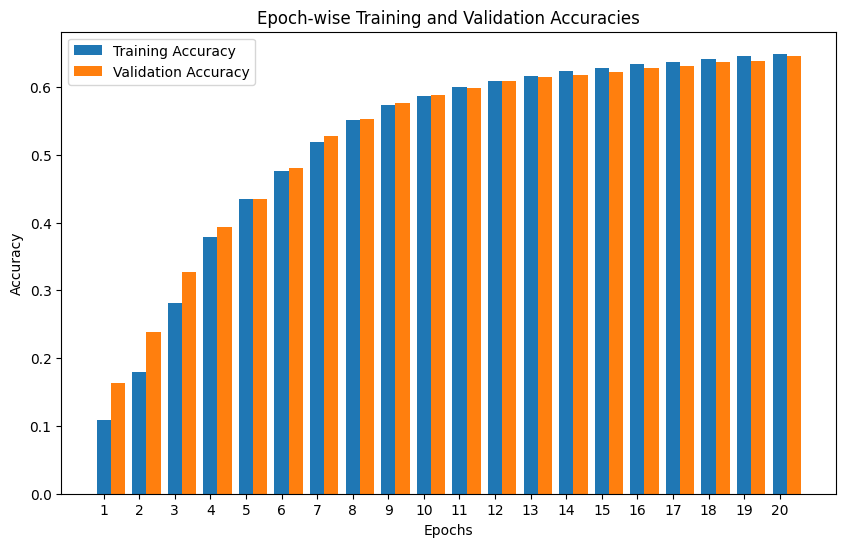

In [ ]:
   import matplotlib.pyplot as plt
   import numpy as np

   epochs = range(1, len(history_1.history['accuracy']) + 1)

   plt.figure(figsize=(10, 6))
   plt.bar(epochs, history_1.history['accuracy'], width=0.4, label='Training Accuracy')
   plt.bar(np.array(epochs) + 0.4, history_1.history['val_accuracy'], width=0.4, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Epoch-wise Training and Validation Accuracies')
   plt.xticks(epochs)
   plt.legend()
   plt.show()

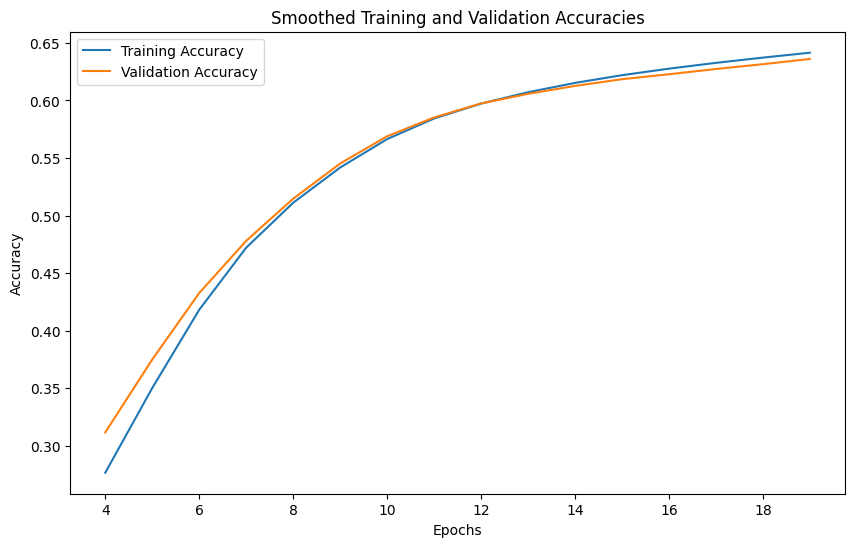

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_1.history)

   # Smooth the lines using a rolling average
   df['smoothed_accuracy'] = df['accuracy'].rolling(window=5).mean()
   df['smoothed_val_accuracy'] = df['val_accuracy'].rolling(window=5).mean()

   # Plot the smoothed lines with confidence intervals
   plt.figure(figsize=(10, 6))
   sns.lineplot(x=df.index, y='smoothed_accuracy', data=df, label='Training Accuracy')
   sns.lineplot(x=df.index, y='smoothed_val_accuracy', data=df, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Smoothed Training and Validation Accuracies')
   plt.legend()
   plt.show()

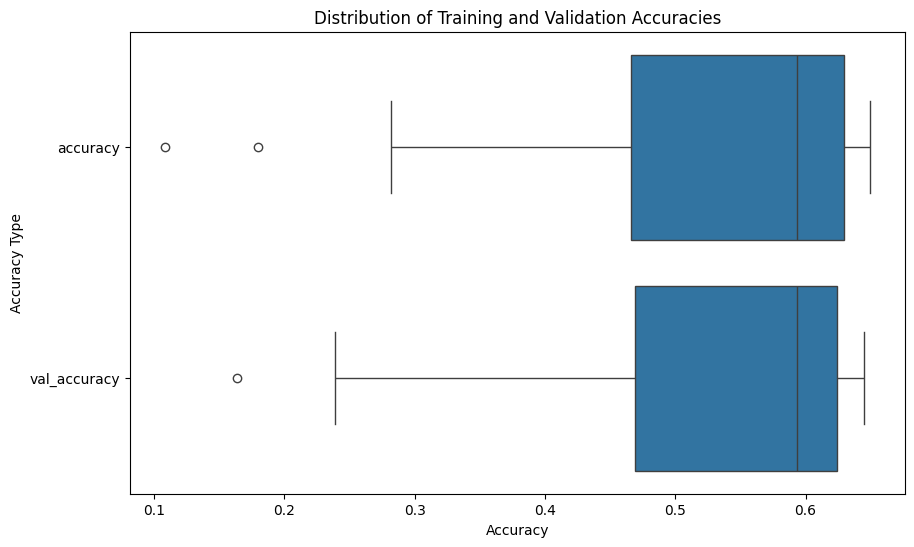

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_1.history)
   df['Epoch'] = df.index + 1

   df_melted = pd.melt(df, id_vars=['Epoch'], value_vars=['accuracy', 'val_accuracy'], var_name='Accuracy Type', value_name='Accuracy')

   # Plot the box plots
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='Accuracy', y='Accuracy Type', data=df_melted)
   plt.title('Distribution of Training and Validation Accuracies')
   plt.show()

**Observations:**

The ANN model is fairly straight-forward with only two hidden layers and one output layer. The ReLu activation function is common for introducing non-linearity. The model is trained for 20 epochs with 20% of the training data held over for validation. There are some signs of potential over-fitting such as the validation accuracy lagging behind the training accuracy. More hidden layers could be added to increase the complexity of the model to address possible over-fitting, data augmentation could be another option, finally, an alternative optimizer setting or different optimizer might also help with this issue.

*   Run Time:     22 seconds
*   Accuracy:     65.01%
*   Val_Accuracy: 64.32%

Clear the previous model's history from the Keras backend. Fix the seed again after clearing the backend.

In [ ]:
#CLEAR BACKEND
from tensorflow.keras import backend
backend.clear_session()

### **Second Model Architecture**
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model**

In [ ]:
ANN_model_2 = Sequential()
ANN_model_2.add(Flatten(input_shape=(32, 32)))
ANN_model_2.add(Dense(256, input_shape=(1024,), activation='relu'))
ANN_model_2.add(Dense(128, activation='relu'))
ANN_model_2.add(Dropout(0.2))
ANN_model_2.add(Dense(64, activation='relu'))
ANN_model_2.add(Dense(64, activation='relu'))
ANN_model_2.add(Dense(32, activation='relu'))
ANN_model_2.add(BatchNormalization())
ANN_model_2.add(Dense(10, activation='softmax'))

In [ ]:
ANN_model_2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
nn_model_2 = ANN_model_2
print(nn_model_2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

None


### **Plot the Training and Validation Accuracies**

In [ ]:
history_2 = ANN_model_2.fit(x_train_norm, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0998 - loss: 2.4135 - val_accuracy: 0.1024 - val_loss: 2.3033
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1544 - loss: 2.2340 - val_accuracy: 0.2931 - val_loss: 2.0400
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3430 - loss: 1.8167 - val_accuracy: 0.4877 - val_loss: 1.5617
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4978 - loss: 1.4708 - val_accuracy: 0.5898 - val_loss: 1.2483
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5726 - loss: 1.2829 - val_accuracy: 0.6208 - val_loss: 1.1568
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6190 - loss: 1.1719 - val_accuracy: 0.6485 - val_loss: 1.1078
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6525 - loss: 1.0872 - val_accuracy: 0.6736 - val_loss: 1.0282
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6659 - loss: 1.0502 - val_accu

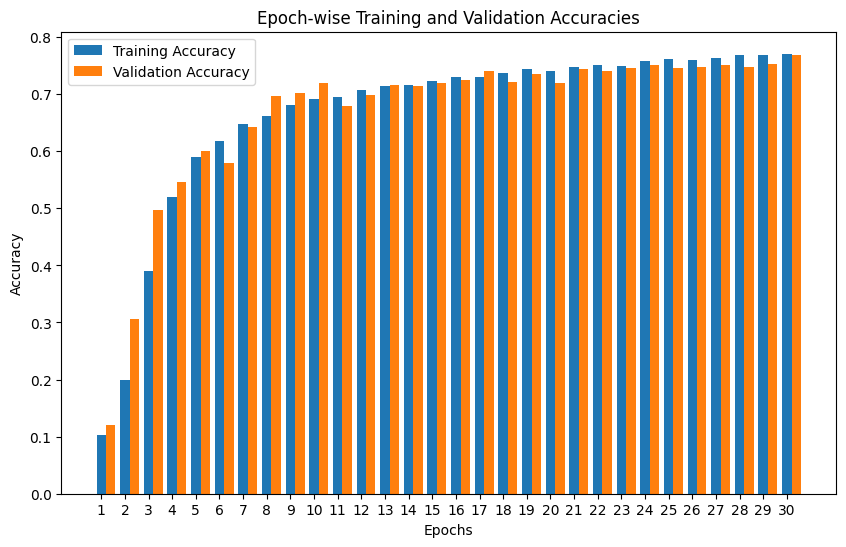

In [ ]:
   import matplotlib.pyplot as plt
   import numpy as np

   epochs = range(1, len(history_2.history['accuracy']) + 1)

   plt.figure(figsize=(10, 6))
   plt.bar(epochs, history_2.history['accuracy'], width=0.4, label='Training Accuracy')
   plt.bar(np.array(epochs) + 0.4, history_2.history['val_accuracy'], width=0.4, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Epoch-wise Training and Validation Accuracies')
   plt.xticks(epochs)
   plt.legend()
   plt.show()

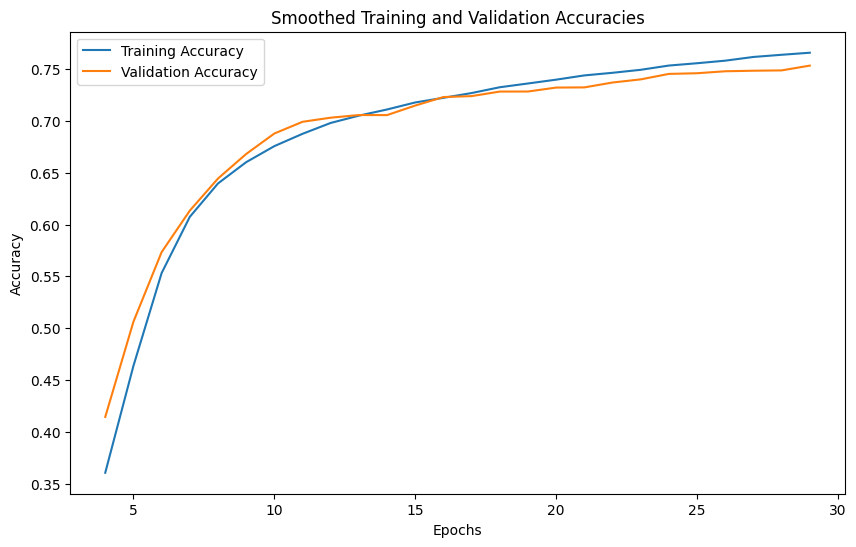

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_2.history)

   # Smooth the lines using a rolling average
   df['smoothed_accuracy'] = df['accuracy'].rolling(window=5).mean()
   df['smoothed_val_accuracy'] = df['val_accuracy'].rolling(window=5).mean()

   # Plot the smoothed lines with confidence intervals
   plt.figure(figsize=(10, 6))
   sns.lineplot(x=df.index, y='smoothed_accuracy', data=df, label='Training Accuracy')
   sns.lineplot(x=df.index, y='smoothed_val_accuracy', data=df, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Smoothed Training and Validation Accuracies')
   plt.legend()
   plt.show()

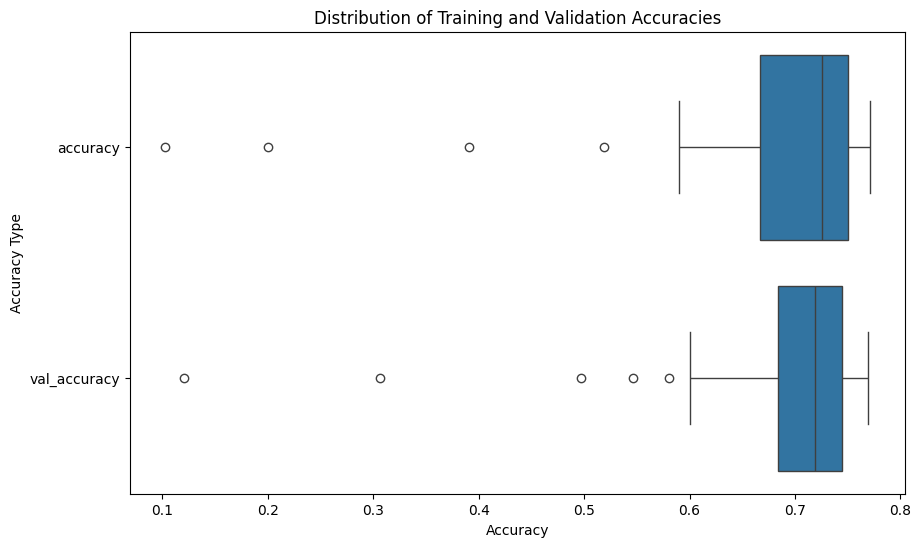

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_2.history)
   df['Epoch'] = df.index + 1

   df_melted = pd.melt(df, id_vars=['Epoch'], value_vars=['accuracy', 'val_accuracy'], var_name='Accuracy Type', value_name='Accuracy')

   # Plot the box plots
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='Accuracy', y='Accuracy Type', data=df_melted)
   plt.title('Distribution of Training and Validation Accuracies')
   plt.show()

**Observations:**

The ANN 2 model shows strong initial learning, with accuracy improving significantly in the early epochs. Training accuracy progresses from 9.98% in epoch 1 to 76.28% in epoch 30, while validation accuracy follows a similar trend, reaching 75.90%. Loss decreases consistently, indicating effective optimization, though validation loss fluctuates in later epochs, suggesting potential overfitting. The model reaches peak validation accuracy around epoch 30 but exhibits minor instability, with slight drops in certain epochs. While the performance is promising, improvements in regularization or early stopping might help mitigate overfitting and enhance generalization.



## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_loss, test_accuracy = ANN_model_2.evaluate(x_test_norm, y_test_encoded)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7692 - loss: 0.7390
Test Loss: 0.7536
Test Accuracy: 0.7672


Convert each entry of y_test to a single label.

In [ ]:
y_test_labels = np.argmax(y_test_encoded, axis=1)

### **Print the classification report and the confusion matrix for the test predictions**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = ANN_model_2.predict(x_test_norm)
y_pred_labels = np.argmax(y_pred, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1814
           1       0.77      0.81      0.79      1828
           2       0.76      0.82      0.79      1803
           3       0.72      0.73      0.72      1719
           4       0.77      0.83      0.80      1812
           5       0.80      0.70      0.75      1768
           6       0.73      0.76      0.75      1832
           7       0.85      0.78      0.81      1808
           8       0.83      0.65      0.73      1812
           9       0.77      0.75      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



Confusion Matrix:
[[1528   48   21   33   39    3   54   16   18   54]
 [  69 1479   28   58   80    6   23   54    8   23]
 [  30   27 1475   56   46   12   15   72   18   52]
 [  36   60   82 1255   46  120   19   34   27   40]
 [  62   48   42   31 1502   19   53    9   13   33]
 [  62   33   29  131   35 1235  112   16   52   63]
 [ 120   39   24   30   80   44 1399    8   65   23]
 [  43   75  155   42   22    9   20 1409    6   27]
 [  84   65   51   47   52   55  181   10 1184   83]
 [ 115   46   44   67   42   42   28   32   44 1344]]


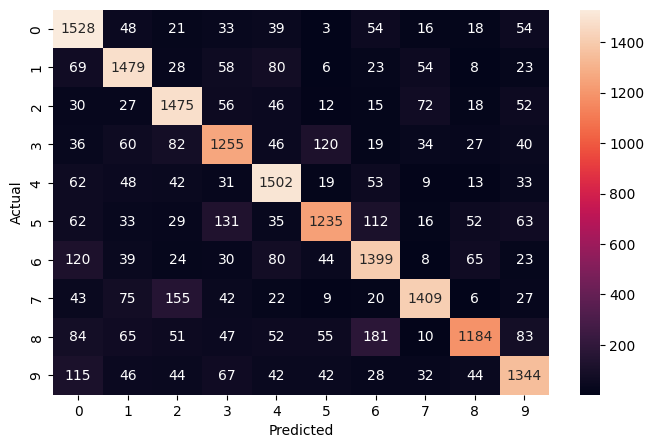

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**

The ANN 2 model achieves a moderate accuracy of 77%, correctly classifying most digits but showing variation across classes. Precision ranges from 0.71 to 0.85, indicating a fair rate of correct identifications, while recall varies from 0.65 to 0.84, suggesting some inconsistency in detecting actual instances. The F1-score, balancing precision and recall, falls between 0.72 and 0.81. While performance is generally consistent, recall could be improved to reduce missed digit classifications. Potential enhancements include addressing class imbalance, refining feature representation, tuning hyperparameters, and experimenting with alternative architectures to improve overall accuracy and generalization.


*   Run Time:     83 seconds
*   Accuracy:     76.28%
*   Val_Accuracy: 75.90%

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Open the HDF5 file in read mode ('r')
with h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/SVHN_single_grey1.h5', 'r') as f:
    # List all datasets in the file
    print("Datasets in the file:")
    for dataset_name in f.keys():
        print(dataset_name)

h5_CNN = h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/SVHN_single_grey1.h5', 'r')

x_train = h5_CNN['X_train'][:]
x_test = h5_CNN['X_test'][:]
y_train = h5_CNN['y_train'][:]
y_test = h5_CNN['y_test'][:]

Datasets in the file:
X_test
X_train
X_val
y_test
y_train
y_val


Check the number of images in the training and the testing dataset.

In [ ]:
len(x_train), len(x_test)

(42000, 18000)

In [ ]:
x_train.shape, x_test.shape

((42000, 32, 32), (18000, 32, 32))

**Observation:**

Data looks like it will be adequate for use in ANN and CNN modeling.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# PRINT THE SHAPE
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
reshaped_x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
reshaped_y_train = y_train.reshape(y_train.shape[0], 1)
reshaped_x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
reshaped_y_test = y_test.reshape(y_test.shape[0], 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
x_train_norm = reshaped_x_train.astype('float32')/255.0
x_test_norm = reshaped_x_test.astype('float32')/255.0
y_train_norm = reshaped_y_train.astype('float32')/255.0
y_test_norm = reshaped_y_test.astype('float32')/255.0


Print New shape of Training and Test

In [ ]:
print(x_train_norm.shape, x_test_norm.shape)

(42000, 32, 32, 1) (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

**Observation:**

The preprocessing hasn't revealed any issues with the data.


## **Model Building**

Fix the seed for random number generators

In [ ]:
import random
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

### **Model Architecture**
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
CNN_Model = Sequential()
CNN_Model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
CNN_Model.add(LeakyReLU(alpha=0.1))
CNN_Model.add(Conv2D(32, (3, 3), padding='same')) # Second conv layer
CNN_Model.add(LeakyReLU(alpha=0.1))
CNN_Model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_Model.add(Flatten())
CNN_Model.add(Dense(32)) # Dense layer with 32 nodes
CNN_Model.add(LeakyReLU(alpha=0.1))
CNN_Model.add(Dense(10, activation='softmax')) # Output layer with 10 nodes and softmax
CNN_Model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
cnn_model_1 = CNN_Model
print(cnn_model_1.summary())
history_2 = CNN_Model.fit(x_train_norm, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 70s 65ms/step - accuracy: 0.3374 - loss: 1.8046 - val_accuracy: 0.8143 - val_loss: 0.6435
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 73s 70ms/step - accuracy: 0.8340 - loss: 0.5857 - val_accuracy: 0.8518 - val_loss: 0.5361
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 76s 65ms/step - accuracy: 0.8662 - loss: 0.4728 - val_accuracy: 0.8670 - val_loss: 0.4889
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.8842 - loss: 0.4020 - val_accuracy: 0.8639 - val_loss: 0.4913
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.8983 - loss: 0.3511 - val_accuracy: 0.8619 - val_loss: 0.4992
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.9096 - loss: 0.3102 - val_accuracy: 0.8633 - val_loss: 0.5111
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9219 - loss: 0.2736 - val_accuracy: 0.8621 - val_loss: 0.5240
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.9

### **Plot the Training and Validation Accuracies**

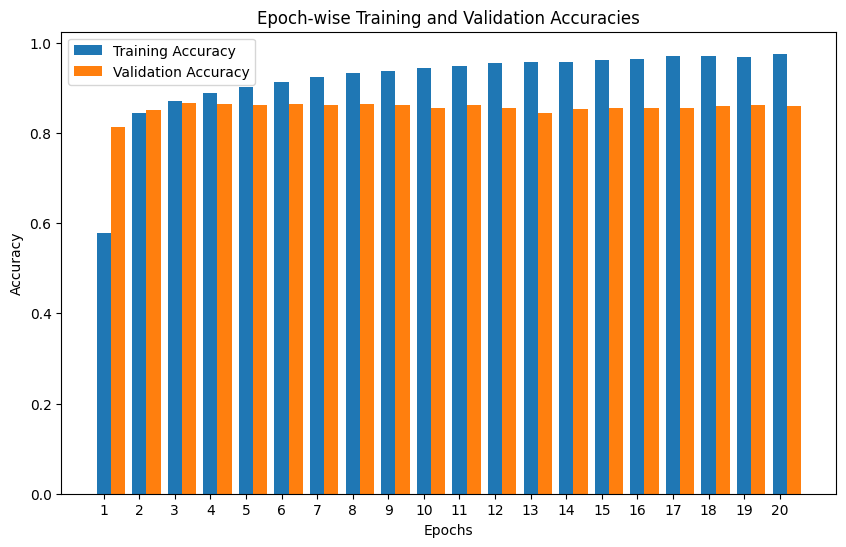

In [ ]:
   import matplotlib.pyplot as plt
   import numpy as np

   epochs = range(1, len(history_2.history['accuracy']) + 1)

   plt.figure(figsize=(10, 6))
   plt.bar(epochs, history_2.history['accuracy'], width=0.4, label='Training Accuracy')
   plt.bar(np.array(epochs) + 0.4, history_2.history['val_accuracy'], width=0.4, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Epoch-wise Training and Validation Accuracies')
   plt.xticks(epochs)
   plt.legend()
   plt.show()

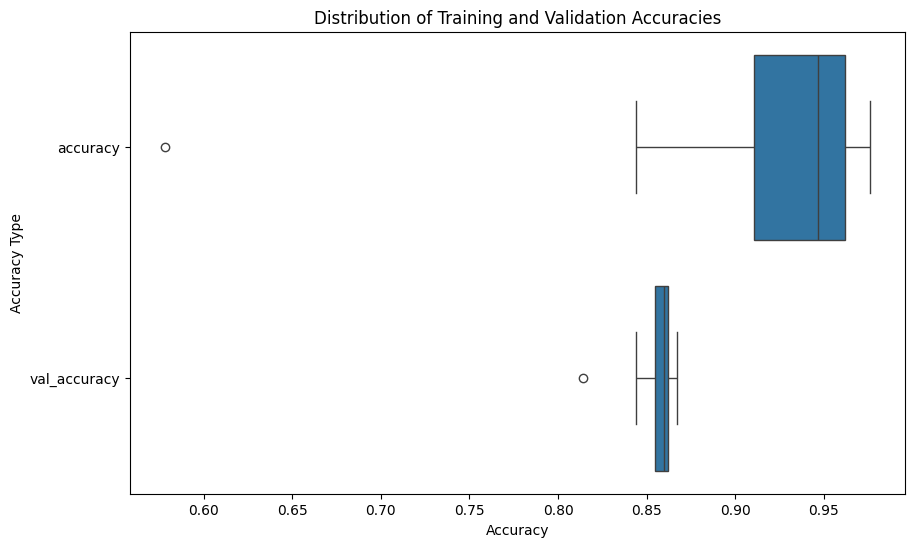

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_2.history)
   df['Epoch'] = df.index + 1

   df_melted = pd.melt(df, id_vars=['Epoch'], value_vars=['accuracy', 'val_accuracy'], var_name='Accuracy Type', value_name='Accuracy')

   # Plot the box plots
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='Accuracy', y='Accuracy Type', data=df_melted)
   plt.title('Distribution of Training and Validation Accuracies')
   plt.show()

**Observations:**

The CNN 1 model demonstrates strong initial learning, with training accuracy rapidly increasing and loss decreasing in the first few epochs. However, signs of overfitting emerge as training accuracy surpasses 95% while validation accuracy peaks at 86.70% around epoch 3 before plateauing or slightly decreasing. Validation loss also begins rising around epoch 6, reinforcing the overfitting concern. The model memorizes training data rather than learning generalizable patterns, suggesting early stopping could have improved performance. Despite this, it achieves reasonable validation accuracy, and further optimization—such as increased dropout, L2 regularization, data augmentation, or architectural adjustments—could enhance generalization to unseen data.

*   Run Time:     26+ minutes
*   Accuracy:     97.44%
*   Val_Accuracy: 85.93%


Clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#CLEAR BACKEND
from tensorflow.keras import backend
backend.clear_session()

### **Second Model Architecture**

 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model**

In [ ]:
def cnn_model_2():
  model = Sequential()
  model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
  return model

CNN_model_2 = cnn_model_2()
print(CNN_model_2.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
history_2 = CNN_model_2.fit(x_train_norm, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 131s 483ms/step - accuracy: 0.3146 - loss: 1.9874 - val_accuracy: 0.2692 - val_loss: 2.0637
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 139s 473ms/step - accuracy: 0.7700 - loss: 0.7415 - val_accuracy: 0.8356 - val_loss: 0.5589
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 147s 491ms/step - accuracy: 0.8195 - loss: 0.5884 - val_accuracy: 0.8733 - val_loss: 0.4434
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 133s 459ms/step - accuracy: 0.8405 - loss: 0.5149 - val_accuracy: 0.8844 - val_loss: 0.4136
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 142s 459ms/step - accuracy: 0.8572 - loss: 0.4668 - val_accuracy: 0.8820 - val_loss: 0.4172
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 476ms/step - accuracy: 0.8723 - loss: 0.4181 - val_accuracy: 0.8594 - val_loss: 0.4822
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 128s 486ms/step - accuracy: 0.8757 - loss: 0.3932 - val_accuracy: 0.9008 - val_loss: 0.3616
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 139s 476ms/step - accuracy: 0.8836 -

### **Plot the Training and Validation accuracies**

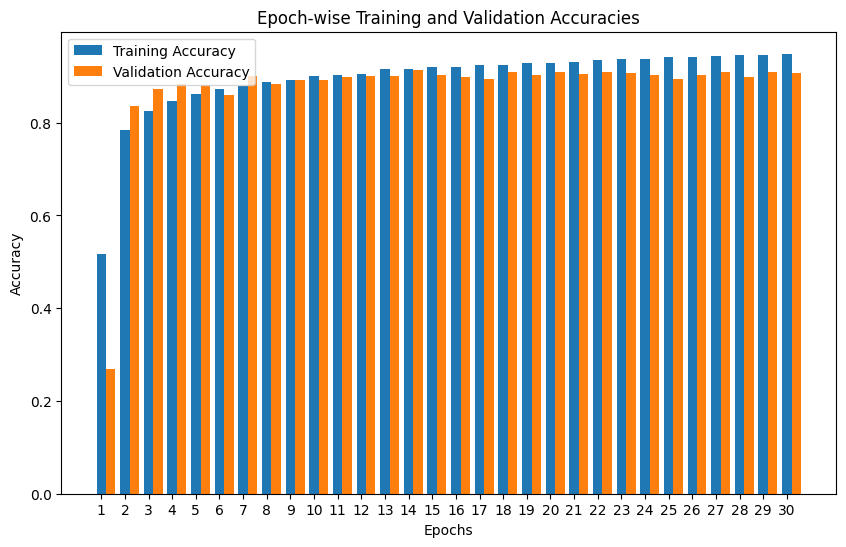

In [ ]:
   import matplotlib.pyplot as plt
   import numpy as np

   epochs = range(1, len(history_2.history['accuracy']) + 1)

   plt.figure(figsize=(10, 6))
   plt.bar(epochs, history_2.history['accuracy'], width=0.4, label='Training Accuracy')
   plt.bar(np.array(epochs) + 0.4, history_2.history['val_accuracy'], width=0.4, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Epoch-wise Training and Validation Accuracies')
   plt.xticks(epochs)
   plt.legend()
   plt.show()

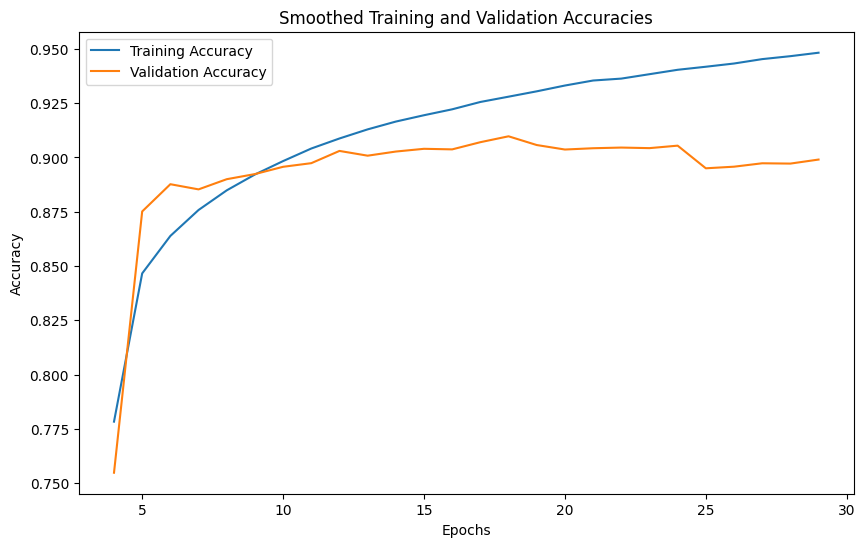

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_2.history)

   # Smooth the lines using a rolling average
   df['smoothed_accuracy'] = df['accuracy'].rolling(window=5).mean()
   df['smoothed_val_accuracy'] = df['val_accuracy'].rolling(window=5).mean()

   # Plot the smoothed lines with confidence intervals
   plt.figure(figsize=(10, 6))
   sns.lineplot(x=df.index, y='smoothed_accuracy', data=df, label='Training Accuracy')
   sns.lineplot(x=df.index, y='smoothed_val_accuracy', data=df, label='Validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.title('Smoothed Training and Validation Accuracies')
   plt.legend()
   plt.show()

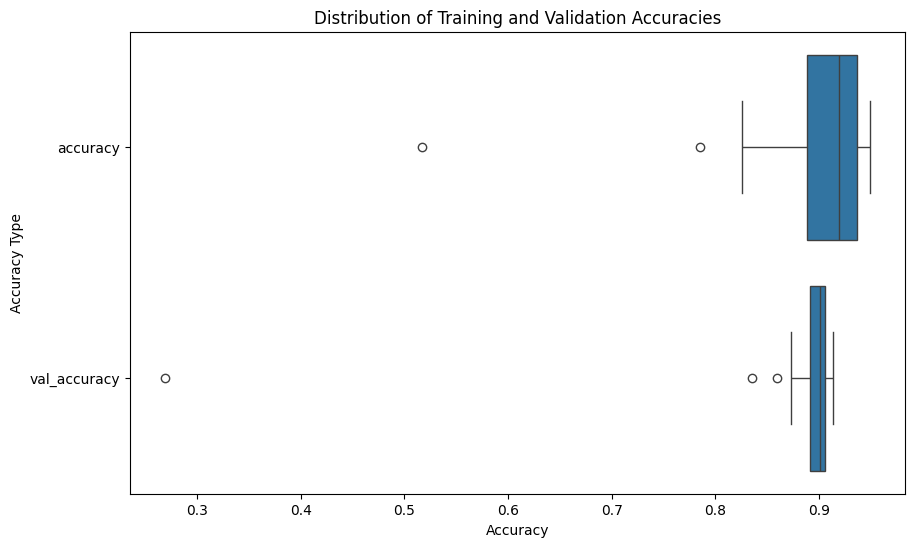

In [ ]:
   import seaborn as sns
   import pandas as pd
   import matplotlib.pyplot as plt

   df = pd.DataFrame(history_2.history)
   df['Epoch'] = df.index + 1

   df_melted = pd.melt(df, id_vars=['Epoch'], value_vars=['accuracy', 'val_accuracy'], var_name='Accuracy Type', value_name='Accuracy')

   # Plot the box plots
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='Accuracy', y='Accuracy Type', data=df_melted)
   plt.title('Distribution of Training and Validation Accuracies')
   plt.show()

**Observations:**

CNN 2 model shows effective learning and convergence with training accuracy surpassing 90%. But the fact it reaches nearly 100% hints it may be overfitting. Validation accuracy improves steadily, but the widening gap between training and validation accuracy indicates the model may be memorizing training data rather than generalizing. Despite this, overall performance is strong. Notably, Epoch 14 shows a significant validation accuracy boost, possibly indicating an ideal early stopping point. Regularization techniques (batch normalization, dropout) help mitigate overfitting, but further tuning could enhance performance. Hyperparameter optimization (learning rate, batch size) may improve generalization, and a separate test dataset evaluation is needed to confirm true generalization capability.

*   Run Time: 60+ minutes
*   Accuracy: 94.5%
*   Val_Accuracy: 91.02%


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

563/563 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9107 - loss: 0.4793
Test Loss: 0.5087
Test Accuracy: 0.9067
563/563 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1814
           1       0.92      0.89      0.90      1828
           2       0.92      0.92      0.92      1803
           3       0.88      0.88      0.88      1719
           4       0.89      0.93      0.91      1812
           5       0.91      0.90      0.90      1768
           6       0.88      0.92      0.90      1832
           7       0.93      0.92      0.93      1808
           8       0.90      0.88      0.89      1812
           9       0.93      0.88      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

Confusion Matrix:
[[1715   15   10    5   14    1   18    

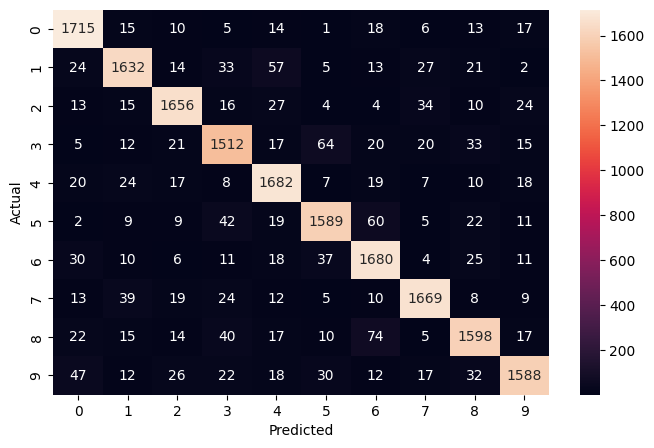

In [ ]:

test_loss, test_accuracy = CNN_model_2.evaluate(x_test_norm, y_test_encoded)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred = CNN_model_2.predict(x_test_norm)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### **Final observations on the performance of the model on the test data.**

**Final Observations:**

The model achieves strong performance on the test dataset with an accuracy of 90.67% and a test loss of 0.5087, indicating reliable digit classification. Class-wise performance metrics show precision ranging from 0.88 to 0.93, recall from 0.88 to 0.95, and F1-scores between 0.88 and 0.93, demonstrating consistent and balanced predictions across different digits. The model generalizes well, effectively identifying unseen digits with minimal variation between classes. Overall, it performs robustly in recognizing handwritten digits from street view images, making it a reliable solution for digit classification tasks.